
## 10.2 注意力汇聚: Nadaraya-Watson 核回归

注意力汇聚有选择地汇聚值以生成最终输出。

In [1]:
'''
10.2 注意⼒汇聚：Nadaraya-Watson 核回归

1964年提出的Nadaraya-Watson核
回归模型是⼀个简单但完整的例⼦，可以⽤于演⽰具有注意⼒机制的机器学习。

'''
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
"""
(1) 生成数据集

"""

n_train = 50 # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5) # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) # 训练样本的输出
x_test = torch.arange(0, 5, 0.1) # 测试样本

y_truth = f(x_test) # 测试样本的真实输出
n_test = len(x_test) # 测试样本数
print(n_test)

50


In [3]:
"""
(2) 绘制样本数据

将绘制所有的训练样本（样本由圆圈表⽰），不带噪声项的真实数据⽣成函数f（标记为“Truth”），
以及学习得到的预测函数（标记为“Pred”）。

"""
import os

def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
        xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)

/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


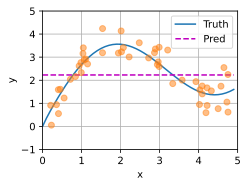

In [4]:
"""
(3) 平均汇聚

"""
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/env_cp311_ymz/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


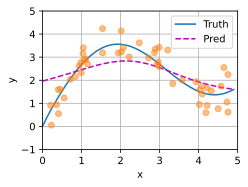

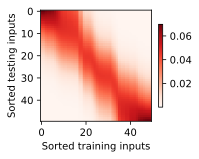

In [5]:
"""
(4) Nadaraya-Watson 核回归

非参数注意力汇聚

当 query 和 key 越接近的时候，分配给value的权重就越大。

"""
# X_repeat的形状:(n_test,n_train),
# 每⼀⾏都包含着相同的测试输⼊（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每⼀⾏都包含着要在给定的每个查询的值（y_train）之间分配的注意⼒权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意⼒权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)


# 显示热力图
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs',
    ylabel='Sorted testing inputs')

In [ ]:
'''
10.2.4 带参数注意力汇聚'''